# CNN using Keras on Mnist

## [1] 2 Conv layers with (3, 3) kernel size

In [95]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import seaborn as sns
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    #plt.show()

In [48]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [49]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [50]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [51]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2669 - acc: 0.9174 - val_loss: 0.0711 - val_acc: 0.9789
Epoch 2/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0933 - acc: 0.9728 - val_loss: 0.0521 - val_acc: 0.9824
Epoch 3/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0680 - acc: 0.9794 - val_loss: 0.0365 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0554 - acc: 0.9834 - val_loss: 0.0335 - val_acc: 0.9882
Epoch 5/12
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0473 - acc: 0.9858 - val_loss: 0.0288 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0430 - acc: 0.9872 - val_loss: 0.0300 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0370 - acc: 0.9890 - val_loss: 0.0301 - val

## [2] 3 Conv layers with varying kernel size. 

In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu')) # 3rd Conv layer with (5,5) kernel size.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.2966 - acc: 0.9062 - val_loss: 0.0499 - val_acc: 0.9836
Epoch 2/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0884 - acc: 0.9728 - val_loss: 0.0319 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0649 - acc: 0.9811 - val_loss: 0.0274 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0536 - acc: 0.9842 - val_loss: 0.0224 - val_acc: 0.9933
Epoch 5/12
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0446 - acc: 0.9867 - val_loss: 0.0213 - val_acc: 0.9932
Epoch 6/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0403 - acc: 0.9880 - val_loss: 0.0224 - val_acc: 0.9930
Epoch 7/12
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0362 - acc: 0.9897 - val_loss: 0.0192 - 

In [104]:
def elbow_curve():
    #score = model.evaluate(x_test, y_test, verbose=0) 
    #print('Test score:', score[0]) 
    #print('Test accuracy:', score[1])

    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

    # list of epoch numbers
    x = list(range(1,epochs+1))

    vy = history.history['val_loss']
    ty = history.history['loss']
    plt_dynamic(x, vy, ty, ax)

In [105]:
def layer_weights_plots():
    w_after = model.get_weights()

    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)


    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')

    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')

    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

<IPython.core.display.Javascript object>


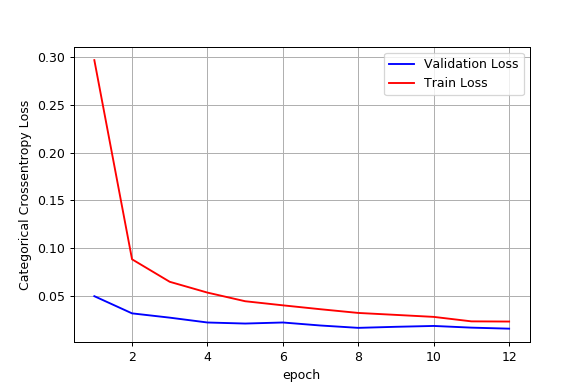

In [106]:
elbow_curve()

<IPython.core.display.Javascript object>


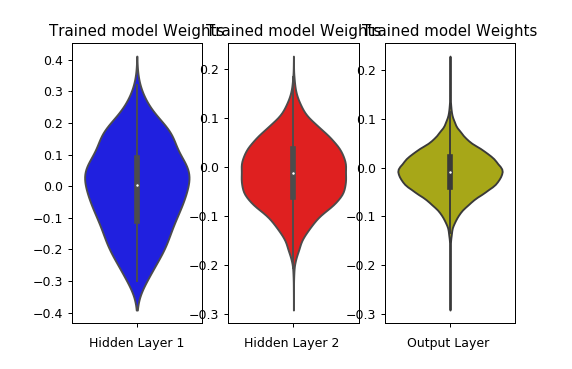

In [107]:
layer_weights_plots()

## [3] 5 Conv layers with varying kernel size. 

In [135]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),  #1st Conv layer- Taking 32 kernels of size (2, 2)
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (3, 3), activation='relu')) #2nd Conv layer- Taking 32 kernels of size (3, 3)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu')) #3rd Conv layer- Taking 32 kernels of size (3, 3)
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu')) #4th Conv layer with (5,5) kernel size.
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu')) #5th Conv layer with (5,5) kernel size.
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [136]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 25, 25, 32)        9248      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 10, 10, 64)        18496     
_________________________________________________________________
dropout_79 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 6, 6, 64)          102464    
__________

In [137]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.3906 - acc: 0.8745 - val_loss: 0.0686 - val_acc: 0.9803
Epoch 2/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0861 - acc: 0.9765 - val_loss: 0.0396 - val_acc: 0.9885
Epoch 3/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0603 - acc: 0.9834 - val_loss: 0.0308 - val_acc: 0.9901
Epoch 4/12
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0486 - acc: 0.9865 - val_loss: 0.0257 - val_acc: 0.9924
Epoch 5/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0403 - acc: 0.9886 - val_loss: 0.0217 - val_acc: 0.9935
Epoch 6/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0361 - acc: 0.9904 - val_loss: 0.0219 - val_acc: 0.9927
Epoch 7/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0324 - acc: 0.9910 - val_loss: 0.0226 - 

<IPython.core.display.Javascript object>


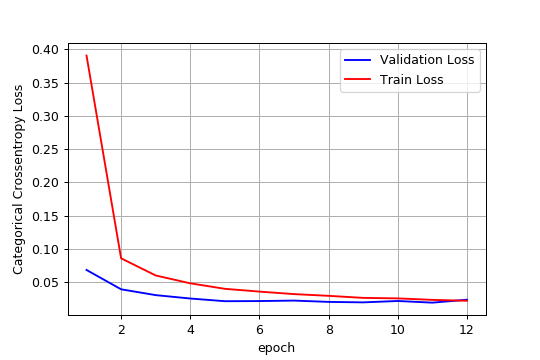

In [138]:
elbow_curve()

<IPython.core.display.Javascript object>


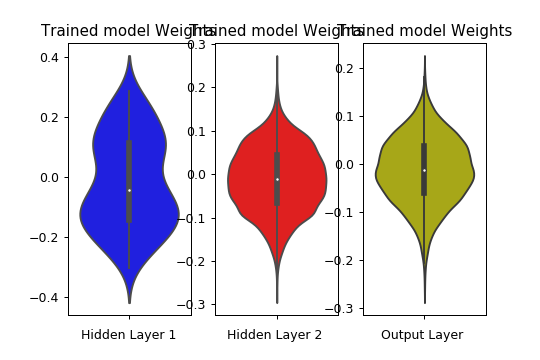

In [139]:
layer_weights_plots()

## [4] 7 Conv layers with varying kernel size. 

In [140]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),  #1st Conv layer- Taking 32 kernels of size (2, 2)
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu')) #2nd Conv layer- Taking 32 kernels of size (3, 3)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) #3rd Conv layer- Taking 32 kernels of size (3, 3)
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) #4th Conv layer with (3, 3) kernel size.
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu')) #5th Conv layer with (3, 3) kernel size.
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu')) #6th Conv layer with (5,5) kernel size.
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu')) #7th Conv layer with (5,5) kernel size.
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_83 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_84 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 13, 13, 64)        36928     
__________

In [142]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 185s 3ms/step - loss: 0.5045 - acc: 0.8320 - val_loss: 0.0612 - val_acc: 0.9801
Epoch 2/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0867 - acc: 0.9756 - val_loss: 0.0339 - val_acc: 0.9893
Epoch 3/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0611 - acc: 0.9832 - val_loss: 0.0261 - val_acc: 0.9924
Epoch 4/12
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0489 - acc: 0.9867 - val_loss: 0.0239 - val_acc: 0.9926
Epoch 5/12
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0399 - acc: 0.9887 - val_loss: 0.0189 - val_acc: 0.9947
Epoch 6/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0368 - acc: 0.9899 - val_loss: 0.0201 - val_acc: 0.9938
Epoch 7/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0326 - acc: 0.9909 - val_loss: 0.0184 - 

<IPython.core.display.Javascript object>


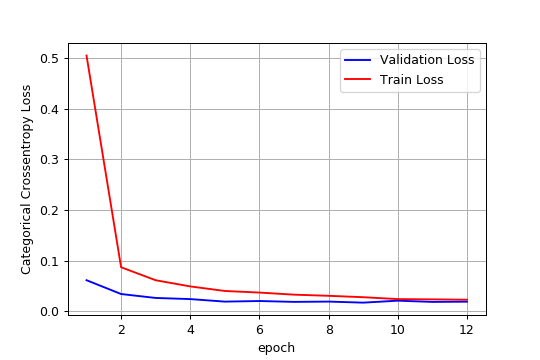

In [143]:
elbow_curve()

<IPython.core.display.Javascript object>


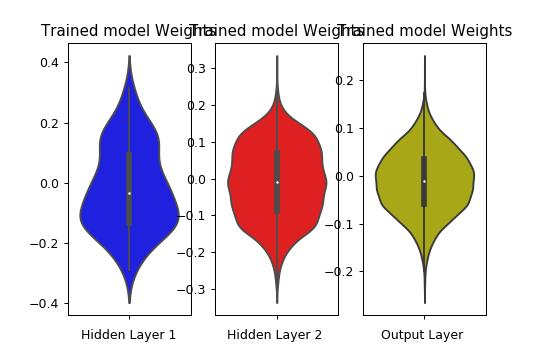

In [144]:
layer_weights_plots()

## [5] Conclusions:

In [163]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Conv Layers - (channels(kernel size))", "Activation","Optimizer", "Dropout", "Test Accuracy"]

x.add_row(["CNN", "2 -> (32(3,3), 64(3, 3))                              ", "RELU", "Adadelta", "0.25", 0.9907])
x.add_row(["CNN", "3 -> (32(3,3), 64(3, 3), 64(5, 5))                    ", "RELU", "Adadelta", "0.25", 0.9956])
x.add_row(["CNN", "5 -> (32(2,2), 32(3, 3), 64(3, 3), 64(5, 5), 64(5, 5))", "RELU", "Adadelta", "0.25", 0.9936])
x.add_row(["CNN", "7 -> (32(2,2), 32(2, 2), 64(3, 3), 64(3, 3), 64(3, 3))", "RELU", "Adadelta", "0.25", 0.9943])
x.add_row(["   ", ", 64(5, 5),64(5, 5))", " ", " ", " ", " "])
print(x)

+-------+--------------------------------------------------------+------------+-----------+---------+---------------+
| Model |         Conv Layers - (channels(kernel size))          | Activation | Optimizer | Dropout | Test Accuracy |
+-------+--------------------------------------------------------+------------+-----------+---------+---------------+
|  CNN  | 2 -> (32(3,3), 64(3, 3))                               |    RELU    |  Adadelta |   0.25  |     0.9907    |
|  CNN  | 3 -> (32(3,3), 64(3, 3), 64(5, 5))                     |    RELU    |  Adadelta |   0.25  |     0.9956    |
|  CNN  | 5 -> (32(2,2), 32(3, 3), 64(3, 3), 64(5, 5), 64(5, 5)) |    RELU    |  Adadelta |   0.25  |     0.9936    |
|  CNN  | 7 -> (32(2,2), 32(2, 2), 64(3, 3), 64(3, 3), 64(3, 3)) |    RELU    |  Adadelta |   0.25  |     0.9943    |
|       |                  , 64(5, 5),64(5, 5))                  |            |           |         |               |
+-------+-----------------------------------------------